### Dicionário de Dados - Registros de Criminalidade

| Coluna          | Descrição |
|-----------------|-----------|
| **`'dr_no'`** | Número Oficial de Registro (composto por: 2 dígitos do ano + código de área + 5 dígitos sequenciais) |
| **`'date_rptd'`** | Data de registro do crime (formato: MM/DD/AAAA) |
| **`'date_occ'`** | Data da ocorrência do crime (formato: MM/DD/AAAA) |
| **`'time_occ'`** | Horário da ocorrência (formato militar 24 horas) |
| **`'area_name'`** | Área Geográfica/Divisão Policial (21 regiões nomeadas por referências geográficas)<br>*Exemplo: A Divisão "77th Street" cobre bairros do sul de Los Angeles, próxima ao cruzamento da South Broadway com a 77th Street* |
| **`'crm_cd_desc'`** | Descrição do tipo de crime cometido |
| **`'vict_age'`** | Idade da vítima (em anos completos) |
| **`'vict_sex'`** | Sexo da vítima:<br>• `F` - Feminino<br>• `M` - Masculino<br>• `X` - Desconhecido |
| **`'vict_descent'`** | Etnia da vítima:<br>• `A` - Asiático (outros)<br>• `B` - Negro/Afro-americano<br>• `C` - Chinês<br>• `D` - Cambojano<br>• `F` - Filipino<br>• `G` - Guamês<br>• `H` - Hispânico/Latino/Mexicano<br>• `I` - Indígena americano/Nativo do Alasca<br>• `J` - Japonês<br>• `K` - Coreano<br>• `L` - Laosiano<br>• `O` - Outros<br>• `P` - Ilhéu do Pacífico<br>• `S` - Samoano<br>• `U` - Havaiano<br>• `V` - Vietnamita<br>• `W` - Branco<br>• `X` - Desconhecido<br>• `Z` - Indiano asiático |
| **`'weapon_desc'`** | Descrição da arma utilizada (quando aplicável) |
| **`'status_desc'`** | Status de investigação do crime |
| **`'location'`** | Endereço exato da ocorrência (rua e número) |

---

In [48]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# ler e visualizar o conjunto de dados
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
display(crimes.head())

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [50]:
# Melhorar a visualização e organização do conjunto de dados
crimes.columns = crimes.columns.str.replace(' ', '_')
crimes.columns = [c.lower() for c in crimes.columns]
crimes['hour_occ'] = crimes['time_occ'].str[:2].astype(int)

display(crimes.head())

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,hour_occ
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dr_no         185715 non-null  int64         
 1   date_rptd     185715 non-null  datetime64[ns]
 2   date_occ      185715 non-null  datetime64[ns]
 3   time_occ      185715 non-null  object        
 4   area_name     185715 non-null  object        
 5   crm_cd_desc   185715 non-null  object        
 6   vict_age      185715 non-null  int64         
 7   vict_sex      185704 non-null  object        
 8   vict_descent  185705 non-null  object        
 9   weapon_desc   73502 non-null   object        
 10  status_desc   185715 non-null  object        
 11  location      185715 non-null  object        
 12  hour_occ      185715 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(8)
memory usage: 18.4+ MB


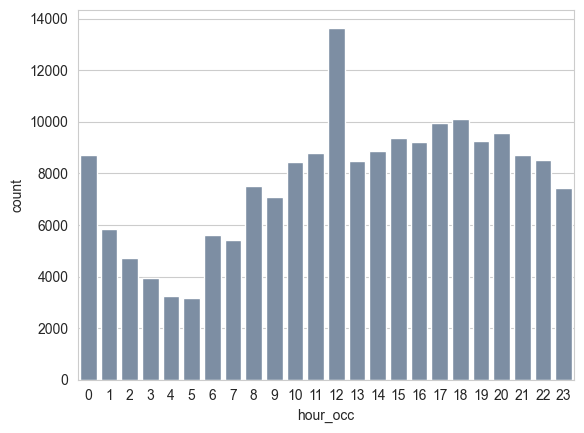

In [53]:
# Countplot para encontrar a maior frequência de crimes por hora
sns.countplot(data=crimes, x='hour_occ', color = '#778da9')
plt.show()

In [8]:
peak_crime_hour = crimes['hour_occ'].value_counts().max()
print(peak_crime_hour) # Maior valor de registros encontrados no mesmo horário

max_peak_crime_hour = 12

13663


In [9]:
night_time = crimes[crimes['hour_occ'].isin([22,23,0,1,2,3])]
peak_night_crime_location = night_time.groupby('area_name', as_index=False)['hour_occ'].count().sort_values('hour_occ', ascending=False).iloc[0]['area_name']
print(peak_night_crime_location) # Área com a maior frequência de crimes noturnos (crimes cometidos entre 22h e 3h59)

Central


In [10]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

crimes['age_bracket'] = pd.cut(crimes['vict_age'], bins=age_bins, labels=age_labels)

In [11]:
victim_ages = crimes['age_bracket'].value_counts()
print(victim_ages)

age_bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


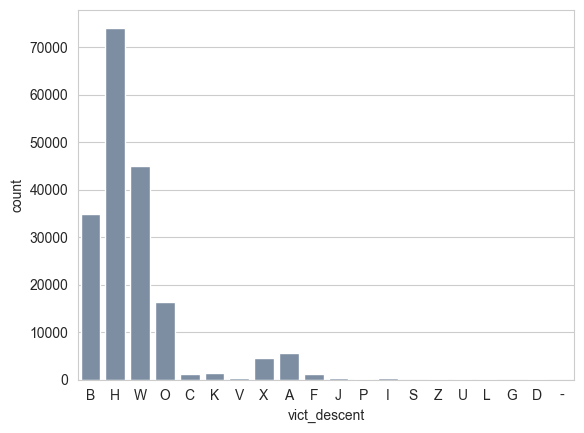

In [54]:
sns.countplot(data=crimes, x='vict_descent', color = '#778da9')
plt.show()

In [13]:
vict_descent = crimes['vict_descent'].value_counts()
print(vict_descent)  # Vítimas de etnia hispânica/latina/mexicana apresentam a maior incidência de crimes registrados

vict_descent
H    74128
W    44985
B    34931
O    16331
A     5519
X     4548
K     1389
F     1228
C     1210
J      433
V      327
I      322
Z      145
P       83
U       54
D       21
L       20
S       16
G       14
-        1
Name: count, dtype: int64


In [56]:
crime_by_type = crimes['crm_cd_desc'].value_counts()
print(crime_by_type)

crm_cd_desc
THEFT OF IDENTITY                                 22670
BATTERY - SIMPLE ASSAULT                          19694
BURGLARY FROM VEHICLE                             13799
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    13215
INTIMATE PARTNER - SIMPLE ASSAULT                 11981
                                                  ...  
BRIBERY                                               1
GRAND THEFT / INSURANCE FRAUD                         1
TILL TAP - GRAND THEFT ($950.01 & OVER)               1
DISHONEST EMPLOYEE ATTEMPTED THEFT                    1
LYNCHING                                              1
Name: count, Length: 104, dtype: int64


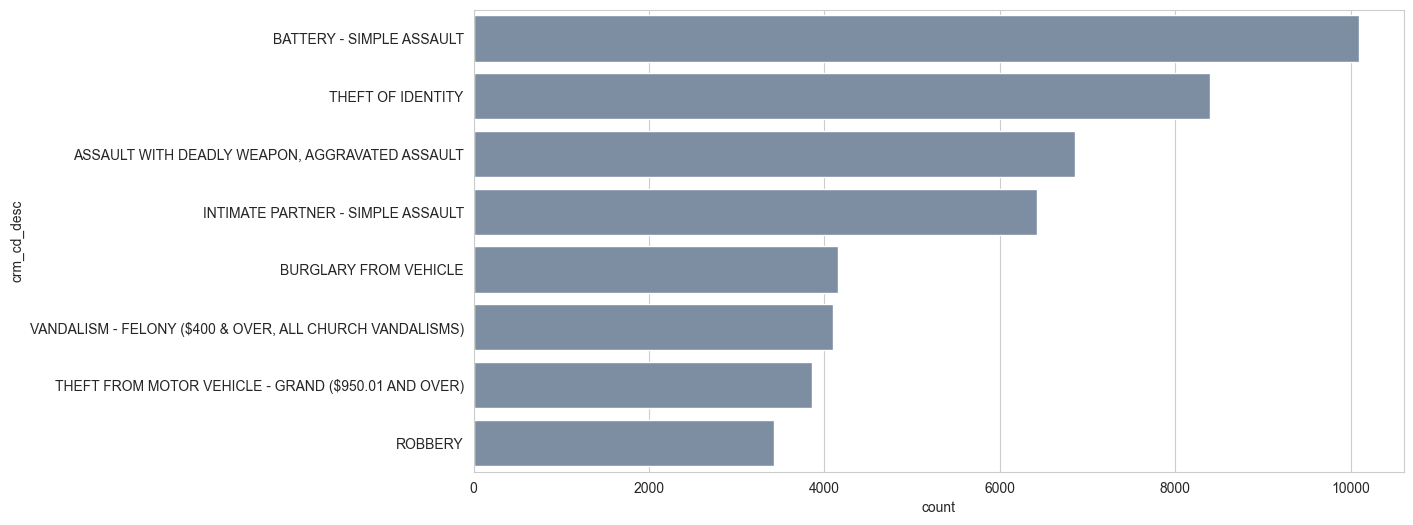

In [55]:
plt.figure(figsize=(12, 6))

crimes_filtered = crimes[crimes['vict_descent'] == 'H']
sns.countplot(data=crimes_filtered, y='crm_cd_desc', order=crimes_filtered['crm_cd_desc'].value_counts().index[:8], color = '#778da9')
plt.show() # → LESÃO CORPORAL / AGRESSÃO SIMPLES

In [36]:
crime_status = crimes['status_desc'].value_counts()
print(crime_status)

status_desc
Invest Cont     153790
Adult Other      17722
Adult Arrest     13397
Juv Arrest         492
Juv Other          312
UNK                  2
Name: count, dtype: int64
